# Simulated Annealing applyed to Eggholder function

$
f(x,y) = -(y+47)\sin\sqrt{\mid \frac{x}{2}+(y+47)\mid}-x\sin\sqrt{\mid x-(y+47)}
$

In [1]:
import math
import random
import numpy as np

# Define the initial solution
def initial_solution():
    return [random.uniform(-512, 512) for _ in range(2)]

# Define the objective function
def objective_function(x, y):
    a = math.sqrt(abs(x/2 + (y+47)))
    b = math.sqrt(abs(x - (y+47)))
    c = -(y + 47) * math.sin(a) - x * math.sin(b)
    return c

# Define the initial temperature
def initial_temperature(acceptance_probability):
    delta_e = []
    for _ in range(100):
        random_solution1 = initial_solution()
        random_solution_value1 = objective_function(random_solution1[0], random_solution1[1])
        random_solution2 = initial_solution()
        random_solution_value2 = objective_function(random_solution2[0], random_solution2[1])
        delta_e.append(abs(random_solution_value2 - random_solution_value1))
    
    return -np.mean(delta_e) / np.log(acceptance_probability)


# Define the acceptance probability
def acceptance_probability(delta_e, temperature):
    return math.exp(-delta_e / temperature)

# Define cooling schedule
def cooling_schedule(temperature, cooling_rate):
    return temperature * cooling_rate

Initial solution: 464.1911817829755, -202.27199043750613
Initial objective: 207.20185795825773
Initial temperature: 445.1641118422617

0 Current solution: 463.0408877976145, -201.304965158779
Current objective: 222.60905418275013
Current temperature: 422.90590625014863

1 Current solution: 460.9310090736045, -200.83397644807292
Current objective: 248.59904150914468
Current temperature: 401.76061093764116

2 Current solution: 456.59397661904353, -202.09532013396546
Current objective: 296.41105700671915
Current temperature: 381.6725803907591

3 Current solution: 450.63008127663, -207.0479558655628
Current objective: 340.11502284170706
Current temperature: 362.5889513712211

4 Current solution: 453.0727570422917, -205.60434346181268
Current objective: 323.5080531101404
Current temperature: 344.45950380266004

5 Current solution: 452.72691634455447, -205.8042299197977
Current objective: 326.1108041574428
Current temperature: 327.236528612527

6 Current solution: 450.8576867717626, -207.467

C:\Users\rafel\AppData\Local\Temp\ipykernel_21484\3343051950.py:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet')


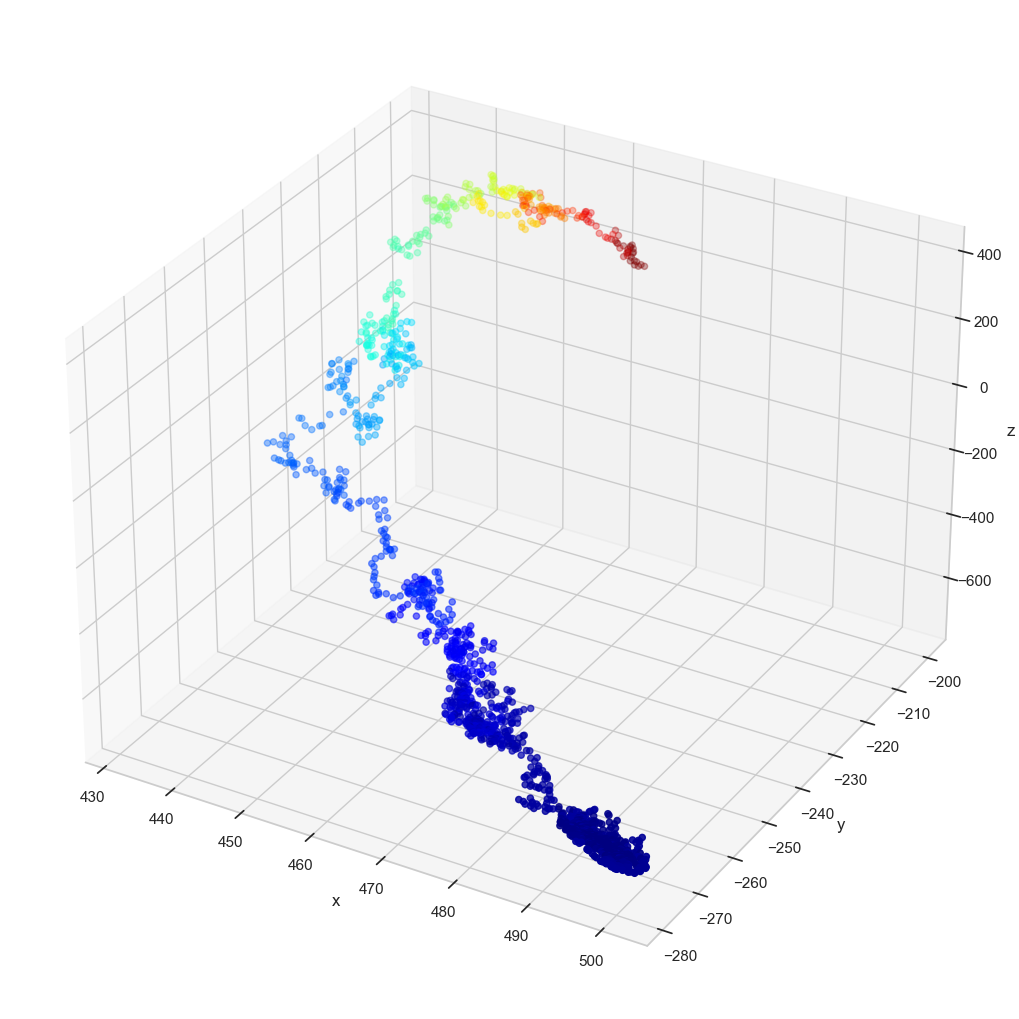

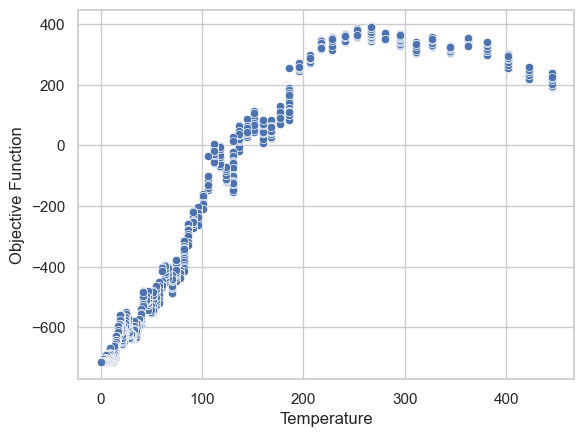

In [6]:
import re, seaborn as sns

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

temp = initial_temperature(0.5)
min_temp = 0.0001
x, y, z, temp_list = [], [], [], []

current_solution = initial_solution()
current_objective = objective_function(current_solution[0], current_solution[1])
best_solution = current_solution
best_objective = current_objective
pertubations_accepted = 0
x.append(current_solution[0])
y.append(current_solution[1])
z.append(current_objective)
temp_list.append(temp)
print(f'Initial solution: {current_solution[0]}, {current_solution[1]}\nInitial objective: {current_objective}\nInitial temperature: {temp}\n')
i = 0

while temp >= min_temp:
    while pertubations_accepted < 25:
        disturbance = [random.uniform(-1, 1) for _ in range(2)]
        new_solution = [current_solution[i] + disturbance[i] for i in range(len(current_solution))]
        new_objective = objective_function(new_solution[0], new_solution[1])

        delta_e = new_objective - current_objective
        if delta_e < 0:
            current_solution = new_solution
            current_objective = new_objective
            pertubations_accepted += 1
            if current_objective < best_objective:
                best_solution = current_solution
                best_objective = current_objective
                
                x.append(current_solution[0])
                y.append(current_solution[1])
                z.append(current_objective)
                temp_list.append(temp)
        else:
            if random.uniform(0,1) < acceptance_probability(delta_e, temp):
                current_solution = new_solution
                current_objective = new_objective
                pertubations_accepted += 1
                x.append(current_solution[0])
                y.append(current_solution[1])
                z.append(current_objective)
                temp_list.append(temp)

    temp = cooling_schedule(temp, 0.95)
    pertubations_accepted = 0
    print(f'{i} Current solution: {current_solution[0]}, {current_solution[1]}\nCurrent objective: {current_objective}\nCurrent temperature: {temp}\n')
    i += 1

print(f'Best solution: {best_solution[0]}, {best_solution[1]}\nBest objective: {best_objective}')
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = cm.get_cmap('jet')

ax.scatter(x, y, z, c=temp_list, cmap=cmap)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
plt.savefig('simulated-annealing.png')
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x=temp_list, y=z)
ax.set_xlabel('Temperature')
ax.set_ylabel('Objective Function')
plt.savefig('simulated-annealing1.png')